In [1]:
import pandas as pd
import csv
import math
import io
from scipy import stats
#from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()



In [2]:
# Location of the dataset is https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

df = pd.read_csv('PythonLearning/Capstone Project/realtor-data.zip.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [3]:
# to get a better idea of each column, we'll look into it's values, null values, number of unique values and type.
for col in df.columns:
  print(f'{col} values are: ')
  print(df[col].isnull().sum())  
  print(df[col].nunique())
  print(df[col].dtype)
  print(df[col].unique())
  print('-'*30)

brokered_by values are: 
4533
110143
float64
[103378.  52707. 103379. ...  12005.  76918.  98730.]
------------------------------
status values are: 
0
3
object
['for_sale' 'ready_to_build' 'sold']
------------------------------
price values are: 
1541
102137
float64
[105000.  80000.  67000. ... 386464. 488512. 280290.]
------------------------------
bed values are: 
481317
99
float64
[  3.   4.   2.   6.   5.   1.   9.  nan   7.   8.  12.  13.  10.  11.
  33.  24.  28.  14.  18.  20.  16.  15.  19.  17.  40.  21.  86.  31.
  27.  42.  60.  22.  32.  99.  49.  29.  30.  23.  46.  36.  68. 123.
  25.  47.  35.  38.  64.  48.  75. 142.  61.  70.  53.  26.  34.  54.
  71. 210.  66.  44.  37.  62.  72. 100.  55.  74.  73. 473.  52. 110.
 136.  50.  98. 102.  69.  82.  41.  76.  43.  80.  67. 190.  93.  45.
  96.  57.  39.  56.  63.  90. 108. 111. 212.  88. 222. 444. 148.  84.
 114. 120.]
------------------------------
bath values are: 
511771
86
float64
[  2.   1.   3.   5.   4.   7.   6. 

<Axes: xlabel='bed', ylabel='price'>

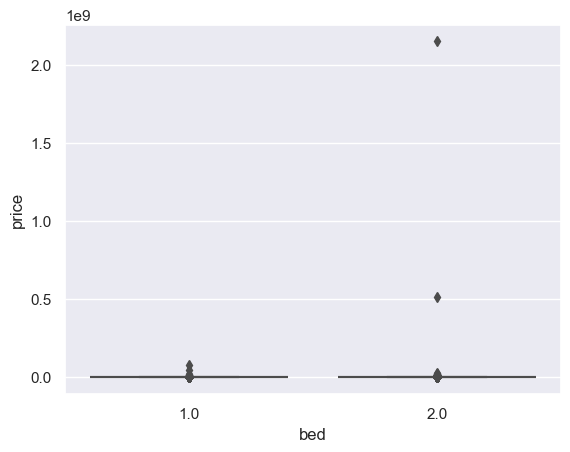

In [11]:
#creating new dataset to only include 1 and 2 bedroom units with price over '0' thus eliminating null values
df_adj=df[(df['bed']<3)&(df['price']>0)]
sns.boxplot(y='price', x='bed', data=df_adj)


<Axes: xlabel='bed', ylabel='price'>

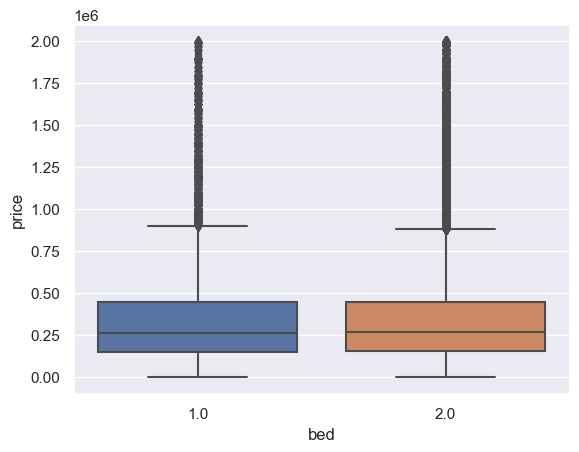

In [31]:
#eliminating outliers, setting higher price limit to 2mln
df_adj=df[(df['bed']<3)&(df['price']>0)&(df['price']<2000000)]
sns.boxplot(y='price', x='bed', data=df_adj)


<Axes: xlabel='bed', ylabel='price'>

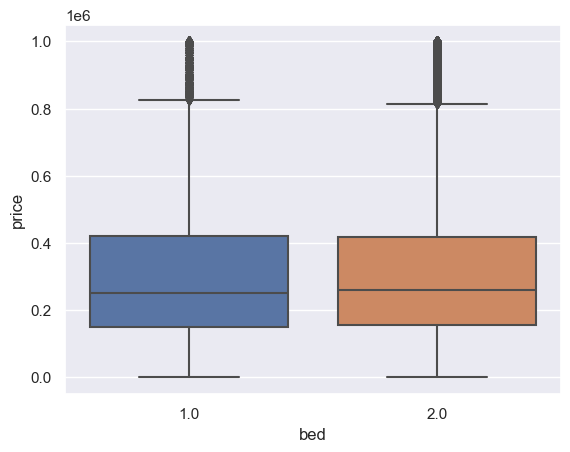

In [15]:
#further excluding outliers from the data. Using 1mln mark shown by the graph
df_adj=df[(df['bed']<3)&(df['price']>0)&(df['price']<1000000)]
sns.boxplot(y='price', x='bed', data=df_adj)


C:\Users\globa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

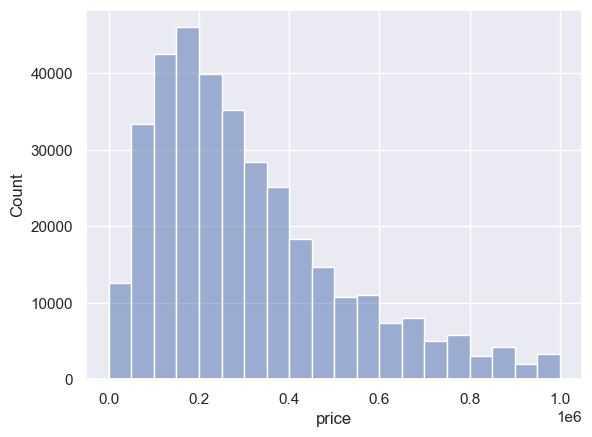

In [23]:
#checking for normal distribution. Appears normally distributed, scewed to the left
sns.histplot(df_adj['price'], alpha= .5, bins=20)

In [22]:
bed_2 = df_adj[(df_adj['bed']== 2)]
bed_1 = df_adj[(df_adj['bed']== 1)]
print(stats.ttest_ind(bed_2['price'], bed_1['price']))
print('One bedroom mean price', bed_1['price'].mean())   
print('Two bedroom mean price', bed_2['price'].mean())
# Ttest shows significant difference with p-value less than 0.05. 
#If we need a higher significance and reduce p-value to 0.001 to difference becomes insignificant.

TtestResult(statistic=2.2063878962912047, pvalue=0.02735748739549504, df=356257.0)
One bedroom mean price 310445.5056832818
Two bedroom mean price 312498.4720562848


In [27]:
df_adj['state'].nunique()

54

In [24]:
#creating state by state comparison of p-values and t-values
A = df_adj['state'].unique()

In [44]:
b=0 #count of results
dfr = pd.DataFrame(columns=['State', '1br', '2br', 't_stat', 'p_value', 'Mean_dif', 'Mean_dif_%'])
for i in range(54):
    bed_2 = df_adj[(df_adj['bed']== 2) & (df_adj['state']==A[i])]
    bed_1 = df_adj[(df_adj['bed']== 1) & (df_adj['state']==A[i])]
    t_stat, p_value = stats.ttest_ind(bed_2['price'], bed_1['price'])
    if p_value < 0.01:
        #print(A[i])
        #print(t_stat, p_value)
        #print('Mean Difference', bed_2['price'].mean()-bed_1['price'].mean())
        #print('% difference', (bed_2['price'].mean()-bed_1['price'].mean())/bed_1['price'].mean()*100)
        b=b+1
        # New row to be added
        new_row = {'State': A[i], '1br': bed_1['price'].mean(), '2br':bed_2['price'].mean(), 't_stat': t_stat, 'p_value': p_value, 
                   'Mean_dif': (bed_2['price'].mean()-bed_1['price'].mean()), 'Mean_dif_%': (bed_2['price'].mean()-bed_1['price'].mean())/bed_1['price'].mean()*100}
        # Add the new row
        dfr.loc[len(dfr)] = new_row
print(dfr.sort_values(by='Mean_dif_%'))    

                   State            1br            2br     t_stat  \
17               Alabama  250924.116352  198065.239570  -4.474829   
26              Oklahoma  180137.361905  150663.802740  -3.867374   
4               New York  598473.377838  564916.742924  -5.875409   
0          Massachusetts  468240.089936  490219.086407   2.858145   
13        North Carolina  237378.851042  253662.796170   2.695897   
16               Georgia  256417.706977  280704.970593   4.042388   
22                  Iowa  147477.376000  165848.721785   2.972190   
15        South Carolina  246101.954545  277809.891705   3.516474   
28            New Mexico  242407.591973  275655.099015   2.644659   
20              Missouri  154047.383439  177653.095973   4.398226   
27              Colorado  416967.688889  482388.475446   5.970314   
29            Washington  400555.316449  473881.835436  10.915025   
10              Virginia  285401.293792  339647.209011   9.581633   
12             Wisconsin  200534.6

In [40]:
# Findings: Although the overall Ttest showed significant difference between one bedroom and two bedroom units the data has to be reviewed further due to inconsistencies. 
# Out of 54 states(and territories), 36 have significant difference in price between one bedroom and two bedrooms. 
# 3 states (New York, Oklahoma and Alabama) show opposite correlation. 
# That might be attributed to coop/condo classification missing, type of building (luxury or standard), size of units not taken into account, distressed sales, etc. 

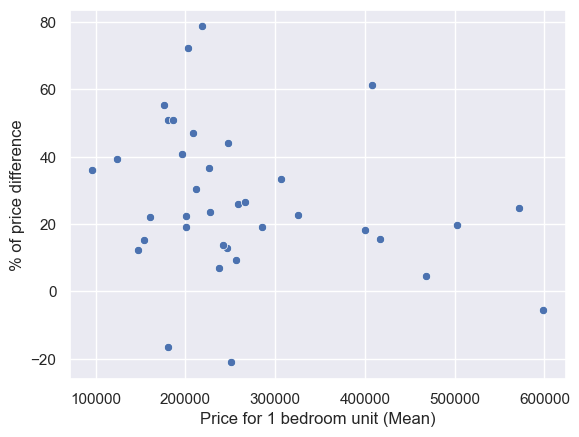

In [47]:
sns.scatterplot(x='1br', y='Mean_dif_%', data=dfr)
plt.xlabel("Price for 1 bedroom unit (Mean)")
plt.ylabel("% of price difference")           
plt.show()